In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pywt

In [104]:
data = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

In [105]:
data['Timestamp'] = data['Timestamp'].apply(lambda x: pd.datetime.fromtimestamp(x).strftime('%Y/%m/%d %H:%M'))


In [106]:
data = data.loc[data.Timestamp >= '2017/01/01']

In [107]:
data.fillna(method='ffill', inplace=True)

<Figure size 864x864 with 0 Axes>

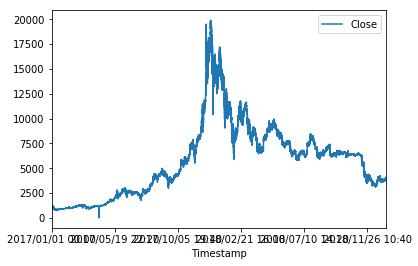

In [108]:
plt.figure(figsize=(12,12))
data.plot(x="Timestamp", y="Close")
plt.show()

In [109]:
data['backward_ewm'] = data['Close'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
data['ewm'] = data['Close'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
data['SMA10'] = data['Close'][:].rolling(window=10, center=False).mean()
data['SMA45'] = data['Close'][:].rolling(window=10, center=False).mean()
data['SMA90'] = data['Close'][:].rolling(window=10, center=False).mean()

In [110]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,backward_ewm,ewm,SMA10,SMA45,SMA90
1039073,2017/01/01 00:00,969.04,969.05,969.04,969.05,1.28591,1246.110245,969.049346,969.050000,969.050000,NaN,NaN,NaN
1039074,2017/01/01 00:01,969.04,969.04,969.04,969.04,5.00000,4845.200000,969.040000,969.049048,969.049048,NaN,NaN,NaN
1039075,2017/01/01 00:02,969.04,969.04,968.48,968.50,10.00000,9686.483459,968.648346,968.996757,968.996757,NaN,NaN,NaN
1039076,2017/01/01 00:03,968.52,968.53,968.50,968.50,1.93129,1870.470675,968.508445,968.949447,968.949447,NaN,NaN,NaN
1039077,2017/01/01 00:04,968.52,968.95,968.51,968.95,0.23708,229.620068,968.534113,968.949500,968.949500,NaN,NaN,NaN


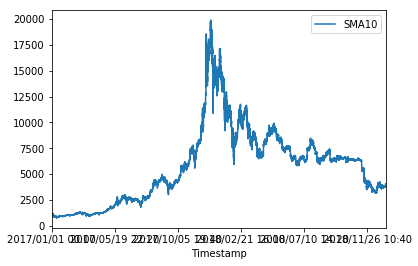

In [111]:
data.plot(x="Timestamp", y="SMA10")
plt.show()

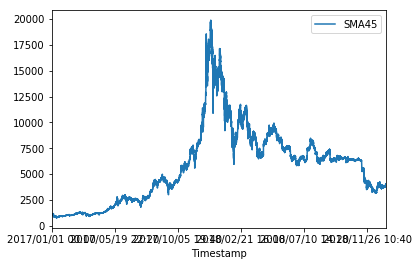

In [112]:
data.plot(x="Timestamp", y="SMA45")
plt.show()

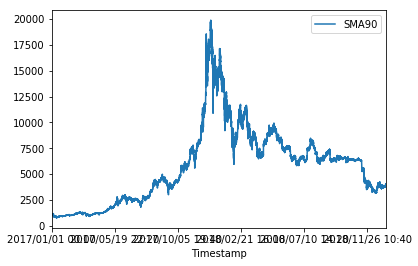

In [113]:
data.plot(x="Timestamp", y="SMA90")
plt.show()

In [114]:
data["SMA90"]

1039073         NaN
1039074         NaN
1039075         NaN
1039076         NaN
1039077         NaN
1039078         NaN
1039079         NaN
1039080         NaN
1039081         NaN
1039082     968.786
1039083     968.743
1039084     968.719
1039085     968.738
1039086     968.754
1039087     968.729
1039088     968.741
1039089     968.755
1039090     968.762
1039091     968.811
1039092     968.834
1039093     968.864
1039094     968.905
1039095     968.969
1039096     969.013
1039097     969.080
1039098     969.107
1039099     969.126
1039100     969.154
1039101     969.221
1039102     969.287
             ...   
2099730    4011.200
2099731    4011.347
2099732    4011.688
2099733    4012.161
2099734    4012.561
2099735    4013.040
2099736    4013.336
2099737    4013.649
2099738    4014.303
2099739    4014.640
2099740    4015.063
2099741    4015.377
2099742    4015.497
2099743    4015.237
2099744    4014.670
2099745    4014.163
2099746    4013.658
2099747    4013.269
2099748    4012.493
